Importing libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
#Reading data and creating a data frame
data=pd.read_excel("E:\\ML\\Conference\\Corrosion_data.xlsx")
df=pd.DataFrame(data)


In [9]:
df

,Serial_Number,Concentration_of_acid,Time(h),Inhibitor_concentration,Temperature,Corrosion_rate,Inhibition_Efficiency (%)
0,1,1.1,6,0.1,302,5.56,48.72
1,2,1.1,6,0.5,302,4.87,55.13
2,3,1.1,6,0.7,302,4.17,61.54
3,4,1.1,6,1.0,302,3.20,70.52
4,5,1.1,6,1.3,302,2.22,79.40
...,...,...,...,...,...,...,...
130,131,0.4,18,0.1,322,1.99,49.41
131,132,0.4,18,0.5,322,1.81,54.12
132,133,0.4,18,0.7,322,1.62,58.82
133,134,0.4,18,1.0,322,0.85,67.06


In [10]:
#Dropping Serial_Number feature as it is no need to consider into our model training. 
data1=df.drop(columns=["Serial_Number"])
data1.head()

,Concentration_of_acid,Time(h),Inhibitor_concentration,Temperature,Corrosion_rate,Inhibition_Efficiency (%)
0,1.1,6,0.1,302,5.56,48.72
1,1.1,6,0.5,302,4.87,55.13
2,1.1,6,0.7,302,4.17,61.54
3,1.1,6,1.0,302,3.20,70.52
4,1.1,6,1.3,302,2.22,79.40


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Concentration_of_acid      135 non-null    float64
 1   Time(h)                    135 non-null    int64  
 2   Inhibitor_concentration    135 non-null    float64
 3   Temperature                135 non-null    int64  
 4   Corrosion_rate             135 non-null    float64
 5   Inhibition_Efficiency (%)  135 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.5 KB


In [12]:
total = data1.isnull().sum().sort_values(ascending = False)
percent = (data1.isnull().sum()/data1.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Concentration_of_acid,Time(h),Inhibitor_concentration,Temperature,Corrosion_rate,Inhibition_Efficiency (%)
Total,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0


There are no null values in all the features.

In [13]:
# Description about the data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Concentration_of_acid,135.0,0.750000,0.286838,0.40,0.40,0.75,1.100,1.10
Time(h),135.0,12.000000,4.917225,6.00,6.00,12.00,18.000,18.00
Inhibitor_concentration,135.0,0.720000,0.413359,0.10,0.50,0.70,1.000,1.30
Temperature,135.0,312.000000,8.195375,302.00,302.00,312.00,322.000,322.00
Corrosion_rate,135.0,2.448593,1.309119,0.10,1.52,2.08,3.125,6.53
Inhibition_Efficiency (%),135.0,63.028889,10.879569,40.32,54.66,61.54,72.175,84.15


Average value of Inhibtor efficiency of 63% with a standard deviation of 10.87%. Average inhibitor concentration belongs to 0.72. 

In [14]:
# Correlation of all features
data1.corr()

,Concentration_of_acid,Time(h),Inhibitor_concentration,Temperature,Corrosion_rate,Inhibition_Efficiency (%)
Concentration_of_acid,1.000000e+00,1.644775e-17,-3.598722e-16,-4.615708e-15,0.126039,0.019636
Time(h),1.644775e-17,1.000000e+00,6.358908e-17,8.368614e-16,-0.752200,0.103074
Inhibitor_concentration,-3.598722e-16,6.358908e-17,1.000000e+00,4.617545e-16,-0.530575,0.952515
Temperature,-4.615708e-15,8.368614e-16,4.617545e-16,1.000000e+00,0.123326,-0.130334
Corrosion_rate,1.260391e-01,-7.522004e-01,-5.305752e-01,1.233264e-01,1.000000,-0.640995
Inhibition_Efficiency (%),1.963553e-02,1.030740e-01,9.525149e-01,-1.303344e-01,-0.640995,1.000000


From the above correlations, we can observe that 
        Conc. of acid has week correlation with corrosion rate and inhibition efficiency.
        Time has negative correlation with corrosion rate and week correlation with inhibition efficiency.
        inhibitor concentration has a strong positive correlation with inhibtor efficiecy and moderate negative correlation with corrosion rate.

 Summary: The strongest correlation is between Inhibitor_concentration and Inhibition_Efficiency (%), indicating a significant positive relationship.
    Time(h) has a strong negative correlation with Corrosion_rate, suggesting that as time increases, corrosion rate decreases. Corrosion_rate has a negative correlation with Inhibitor_concentration and Inhibition_Efficiency (%), suggesting that higher inhibitor concentrations and efficiency lead to lower corrosion rates.  Temperature has a weak influence on the variables in this dataset.       



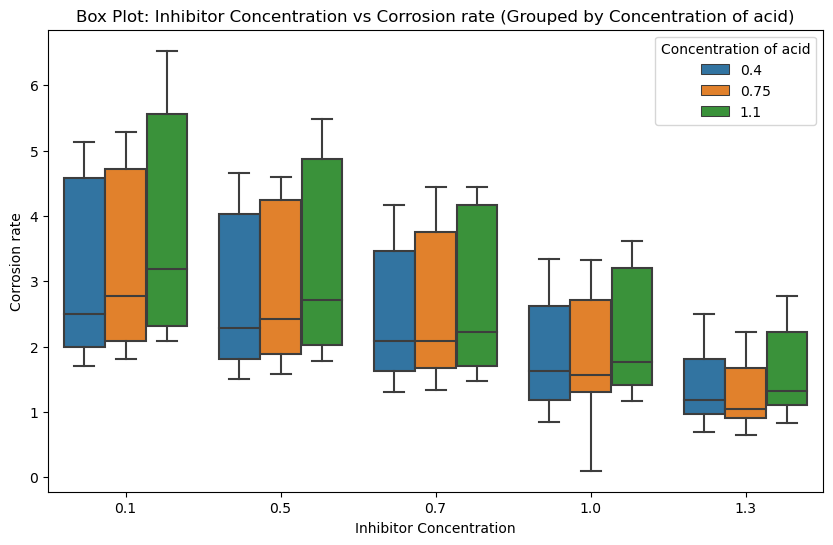

In [15]:

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Inhibitor_concentration', y='Corrosion_rate', hue='Concentration_of_acid', data=df)

# Customize the plot
plt.title('Box Plot: Inhibitor Concentration vs Corrosion rate (Grouped by Concentration of acid)')
plt.xlabel('Inhibitor Concentration')
plt.ylabel('Corrosion rate')
plt.legend(title='Concentration of acid')

# Show the plot
plt.show()


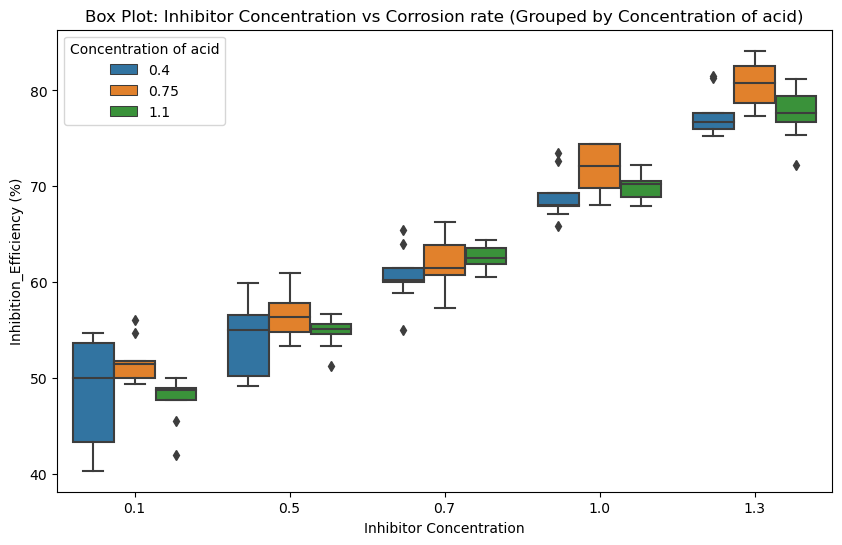

In [16]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Inhibitor_concentration', y='Inhibition_Efficiency (%)', hue='Concentration_of_acid', data=df)

# Customize the plot
plt.title('Box Plot: Inhibitor Concentration vs Corrosion rate (Grouped by Concentration of acid)')
plt.xlabel('Inhibitor Concentration')
plt.ylabel('Inhibition_Efficiency (%)')
plt.legend(title='Concentration of acid')

# Show the plot
plt.show()

In [61]:
# Separate the dataset into target and input features
target=data1.iloc[:,4:]
features=data1.iloc[:,:4]
X=features
y=target

print("y_ target features are:")
y.head()


y_ target features are:


,Corrosion_rate,Inhibition_Efficiency (%)
0,5.56,48.72
1,4.87,55.13
2,4.17,61.54
3,3.20,70.52
4,2.22,79.40


Model_Training

In [62]:
# Importing all the required libraries for model training and model evaluation


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-1, 1, 5, 10, 20, 35, 40, 45, 50, 55, 80, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", lasso_regressor.best_params_)

#Make predictions on the test set and Evaluate the Lasso Regression model on the test set
lasso_predictions = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("lasso_regression MSE:", lasso_mse)
print("lasso_regression r-squared error:", lasso_r2)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+00, tolerance: 1.325e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.499e+01, tolerance: 8.535e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.769e+01, tolerance: 

Best Parameters: {'alpha': 0.001}
lasso_regression MSE: 5.473926680396496
lasso_regression r-squared error: 0.8641003542778046


In [41]:
from sklearn.linear_model import Ridge

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-1, 1, 5, 10, 20, 35, 40, 45, 50, 55, 80, 100]}
ridge_regressor = GridSearchCV(ridge, ridge_parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", ridge_regressor.best_params_)

# Make predictions on the test set and Evaluate the Ridge Regression model on the test set
ridge_predictions = ridge_regressor.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression MSE on Test Set:", ridge_mse)
print("Ridge Regression R-squared on Test Set:", ridge_r2)


Best Parameters: {'alpha': 0.1}
Ridge Regression MSE on Test Set: 5.354027251459273
Ridge Regression R-squared on Test Set: 0.8654414376299087


In [42]:
# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly_model.fit(X_train, y_train)

# Make predictions on the test set and Model Evaluation on the test data set
poly_predictions = poly_model.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)
print(f'Polynomial Regression MSE: {poly_mse}')
print(f'Polynomial Regression r_squared error: {poly_r2}')

Polynomial Regression MSE: 3.2292316684655638
Polynomial Regression r_squared error: 0.9577124546687137


In [43]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set and Model Evaluation on the test data set
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree r_squared error: {dt_r2}')

Decision Tree MSE: 3.3351533333333334
Decision Tree r_squared error: 0.8110793067195657


In [44]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set and Model Evaluation on the test data set
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest r_squared error: {rf_r2}')

Random Forest MSE: 2.345824747111116
Random Forest r_squared error: 0.922196752325478


In [49]:
import xgboost as xgb

# Training the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test data set
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate the XG Boost Regression model on the test set
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f'XG_Boost Regression Mean Squared Error: {mse_xgb}')
print(f'XG_Boost Regression r-squared: {r2_xgb}')

# Save the trained XGBoost Regressor to a pickle file
xgb_model_filename = 'xgb_model.pkl'
with open(xgb_model_filename, 'wb') as xgb_model_file:
    pickle.dump(xgb_regressor, xgb_model_file)

print(f'Trained XGBoost Regressor saved to {xgb_model_filename}')



XG_Boost Regression Mean Squared Error: 1.392727158336288
XG_Boost Regression r-squared: 0.9772927209603445
Trained XGBoost Regressor saved to xgb_model.pkl


In [46]:
#Rank the models performance

models_performance = {
    'Random Forest Regressor': {'MSE': rf_mse, 'R-squared': rf_r2},
    'Decision Tree Regressor': {'MSE': dt_mse, 'R-squared': dt_r2},
    'Lasso Regressor':{'MSE':lasso_mse,'R-squared': lasso_r2},
    'Ridge Regressor':{'MSE':ridge_mse,'R-squared': ridge_r2},
    'Polynomial Regression':{'MSE':poly_mse,'R-squared': poly_r2},
    'XG Boost Regressor':{'MSE':mse_xgb,'R-squared': r2_xgb}
}

In [50]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(models_performance).T

# Rank the models based on R-squared (higher is better)
df['R-squared Rank'] = df['R-squared'].rank(ascending=False)

# Display the ranked results
ranked_models = df.sort_values(by='R-squared Rank')
print("Ranked Models:")
print(ranked_models[['R-squared', 'R-squared Rank']])

Ranked Models:
                         R-squared  R-squared Rank
XG Boost Regressor        0.977293             1.0
Polynomial Regression     0.957712             2.0
Random Forest Regressor   0.922197             3.0
Ridge Regressor           0.865441             4.0
Lasso Regressor           0.864100             5.0
Decision Tree Regressor   0.811079             6.0


XG Boost Regressor has the highest R-squared value (0.98) and is ranked first, indicating that it provides the best fit to the data among the above listed models. The R-squared values provide a measure of how well each model explains the variance in the target variable. 
Higher R-squared values indicate better performance.  